In [178]:
import numpy as np
from numpy import int32
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import fsolve

In [179]:
def f(U_plus):
    kappa = 0.41
    B = 5.1
    Y_plus = U_plus + np.exp(-kappa * B) * (
                np.exp(kappa * U_plus) - 1 - kappa * U_plus - 1 / 2 * (kappa * U_plus) ** 2 - 1 / 6 * (
                    kappa * U_plus) ** 3 - 1 / 24 * ((kappa * U_plus) ** 4))
    return Y_plus

In [180]:
i = 0
U_plus_solution = np.zeros(5)
for Y_plus in ([1, 25, 100, 300, 590]):
    def equation(U_plus, Y_plus):
        return f(U_plus) - Y_plus
    initial_guess = Y_plus
    U_plus_solution[i] = fsolve(equation, initial_guess, args=(Y_plus,))
    i += 1

/var/folders/1c/5122kg2j5m37kvhl5lhr__bc0000gn/T/ipykernel_2698/2093659507.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U_plus_solution[i] = fsolve(equation, initial_guess, args=(Y_plus,))


## (a)


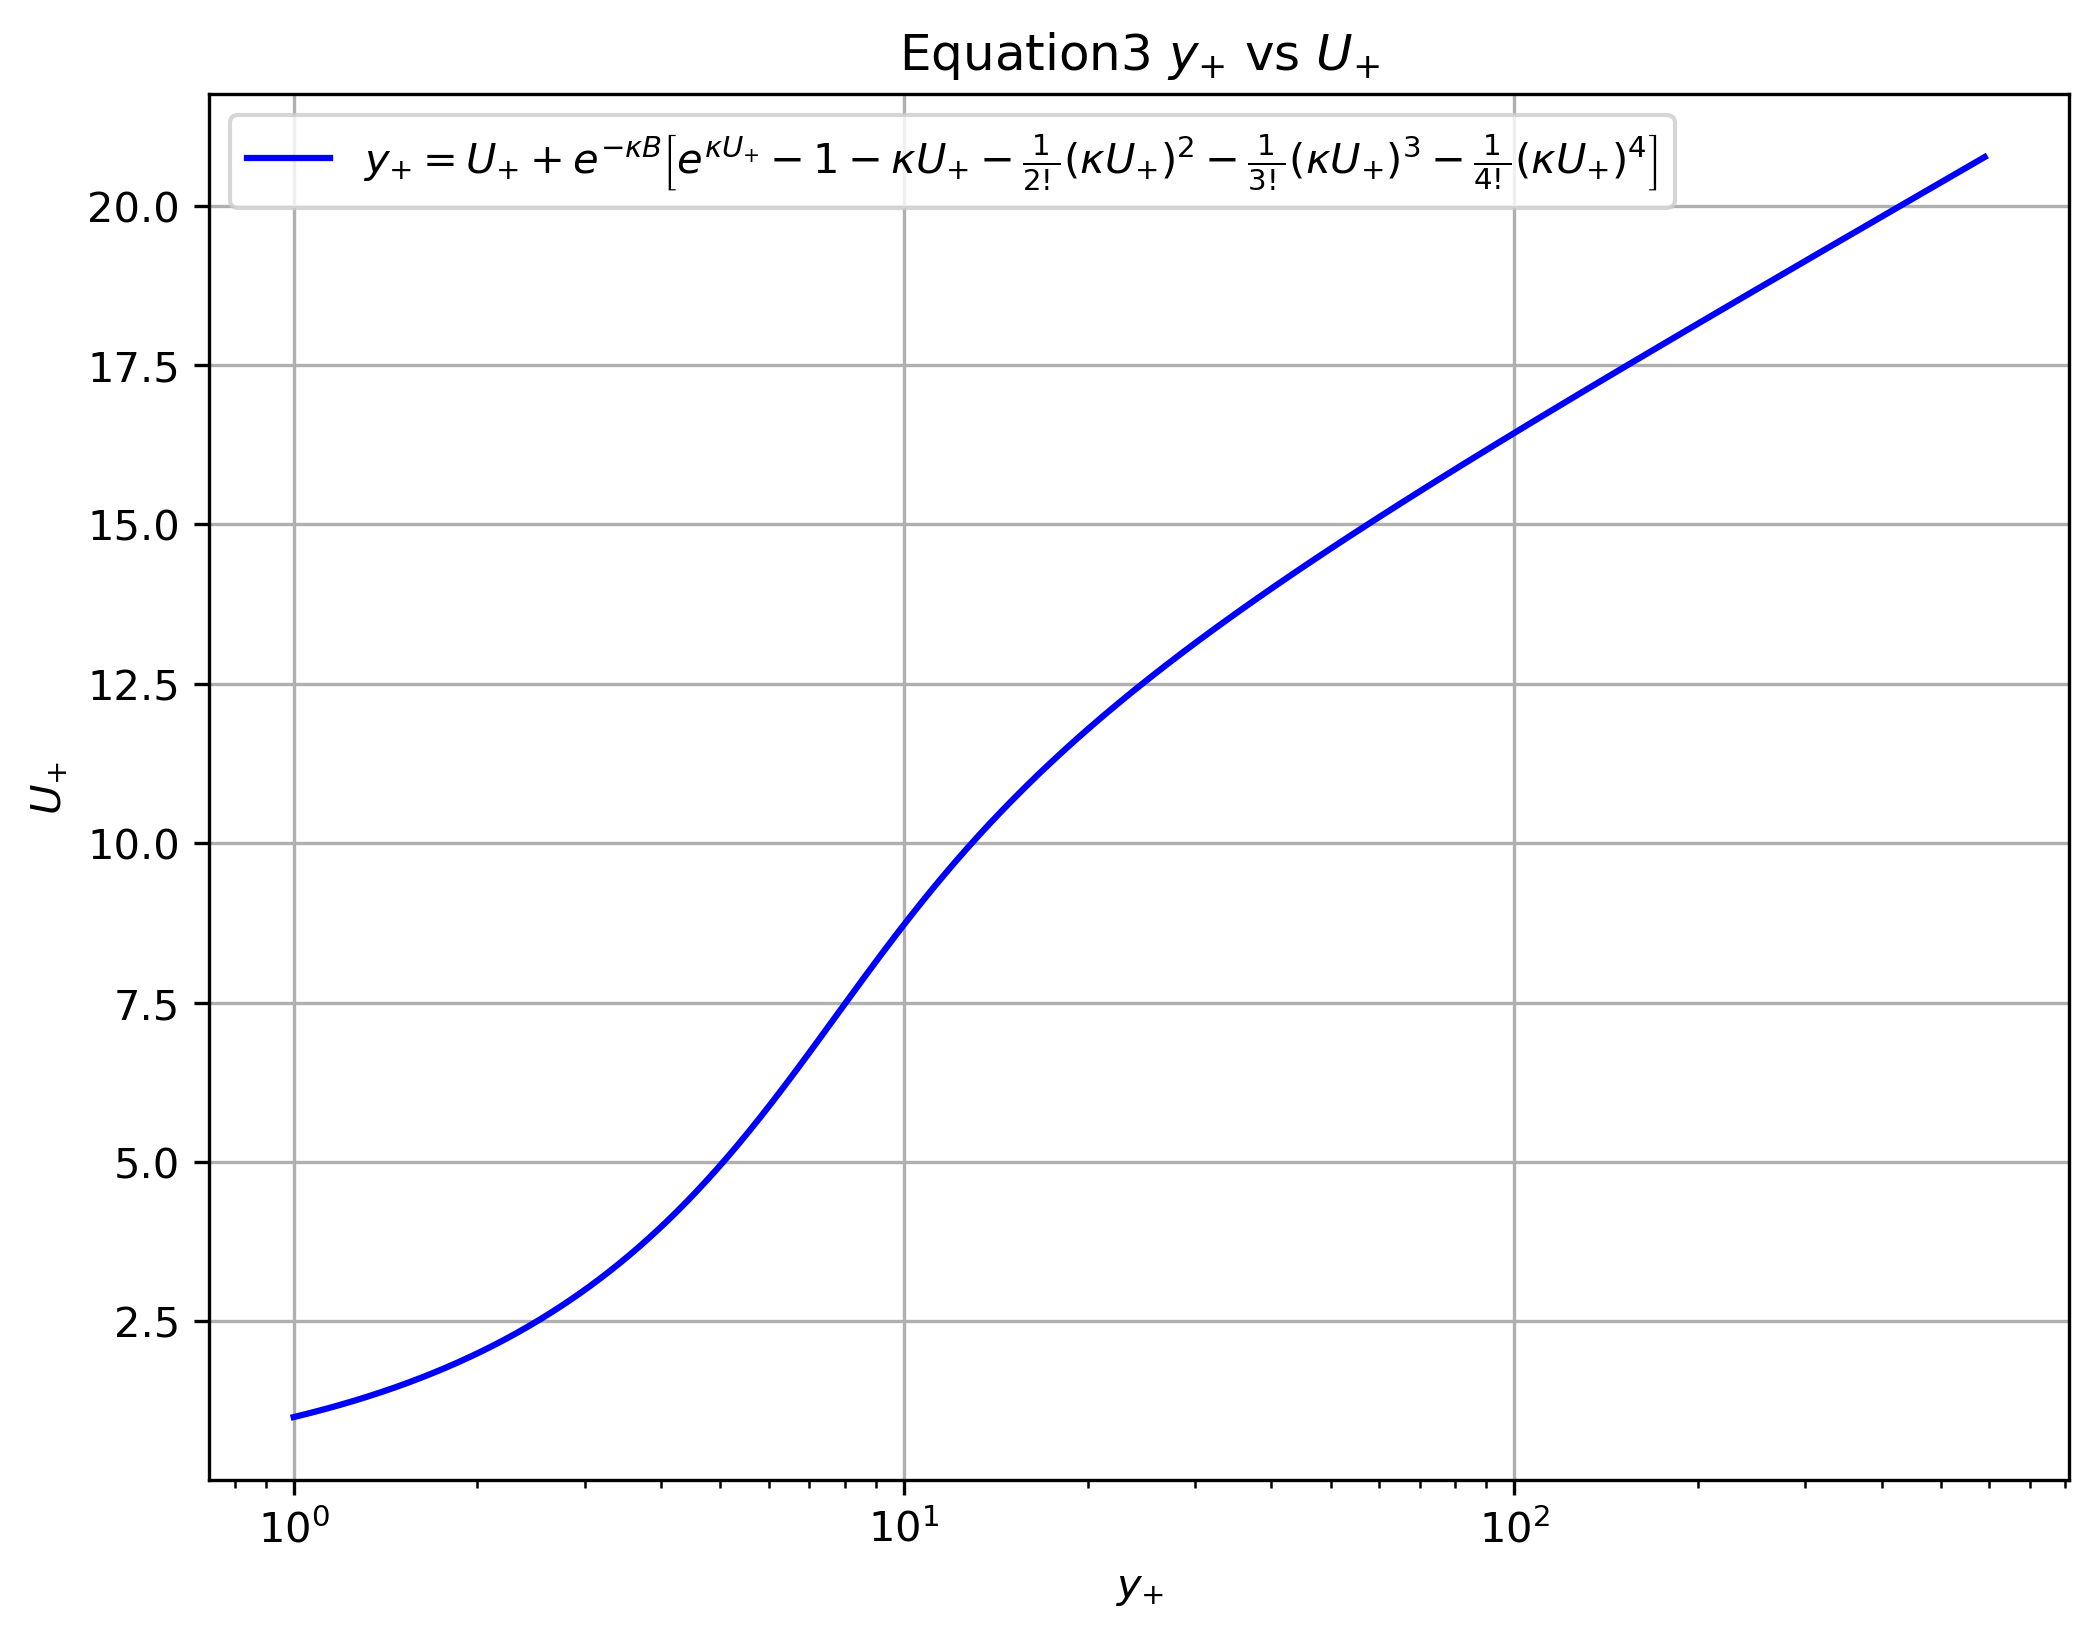

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
U_plus = sp.symbols('U_plus')

# Given constants
kappa = 0.41
B = 5.1

# Expression for y_plus
exp_term = sp.exp(kappa * U_plus) - 1 - kappa * U_plus - (1/2) * (kappa * U_plus)**2 - (1/6) * (kappa * U_plus)**3 - (1/24) * (kappa * U_plus)**4
y_plus_expr = U_plus + sp.exp(-kappa * B) * exp_term

# Convert the symbolic expression to a numerical function
y_plus_func = sp.lambdify(U_plus, y_plus_expr, 'numpy')

# Generate values for U_plus
a=U_plus_solution[0]
b=U_plus_solution[4]
U_plus_vals=np.linspace(a,b,5900)
# Compute corresponding y_plus values
y_plus_vals = y_plus_func(U_plus_vals)
# Plot the function
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(y_plus_vals,U_plus_vals, label=r'$y_{+} = U_{+} + e^{-\kappa B} \left[e^{\kappa U_{+}} - 1 - \kappa U_{+} - \frac{1}{2!}(\kappa U_{+})^2 - \frac{1}{3!}(\kappa U_{+})^3 - \frac{1}{4!}(\kappa U_{+})^4 \right]$', color='blue')
plt.title(r'Equation3 $y_{+}$ vs $U_{+}$')
plt.xlabel(r'$y_{+}$')
plt.ylabel(r'$U_{+}$')
plt.grid(True)
plt.xscale('log')
plt.legend()
plt.show()

## (b)

In [182]:
picewise_x=U_plus_solution
picewise_y=f(U_plus_solution)

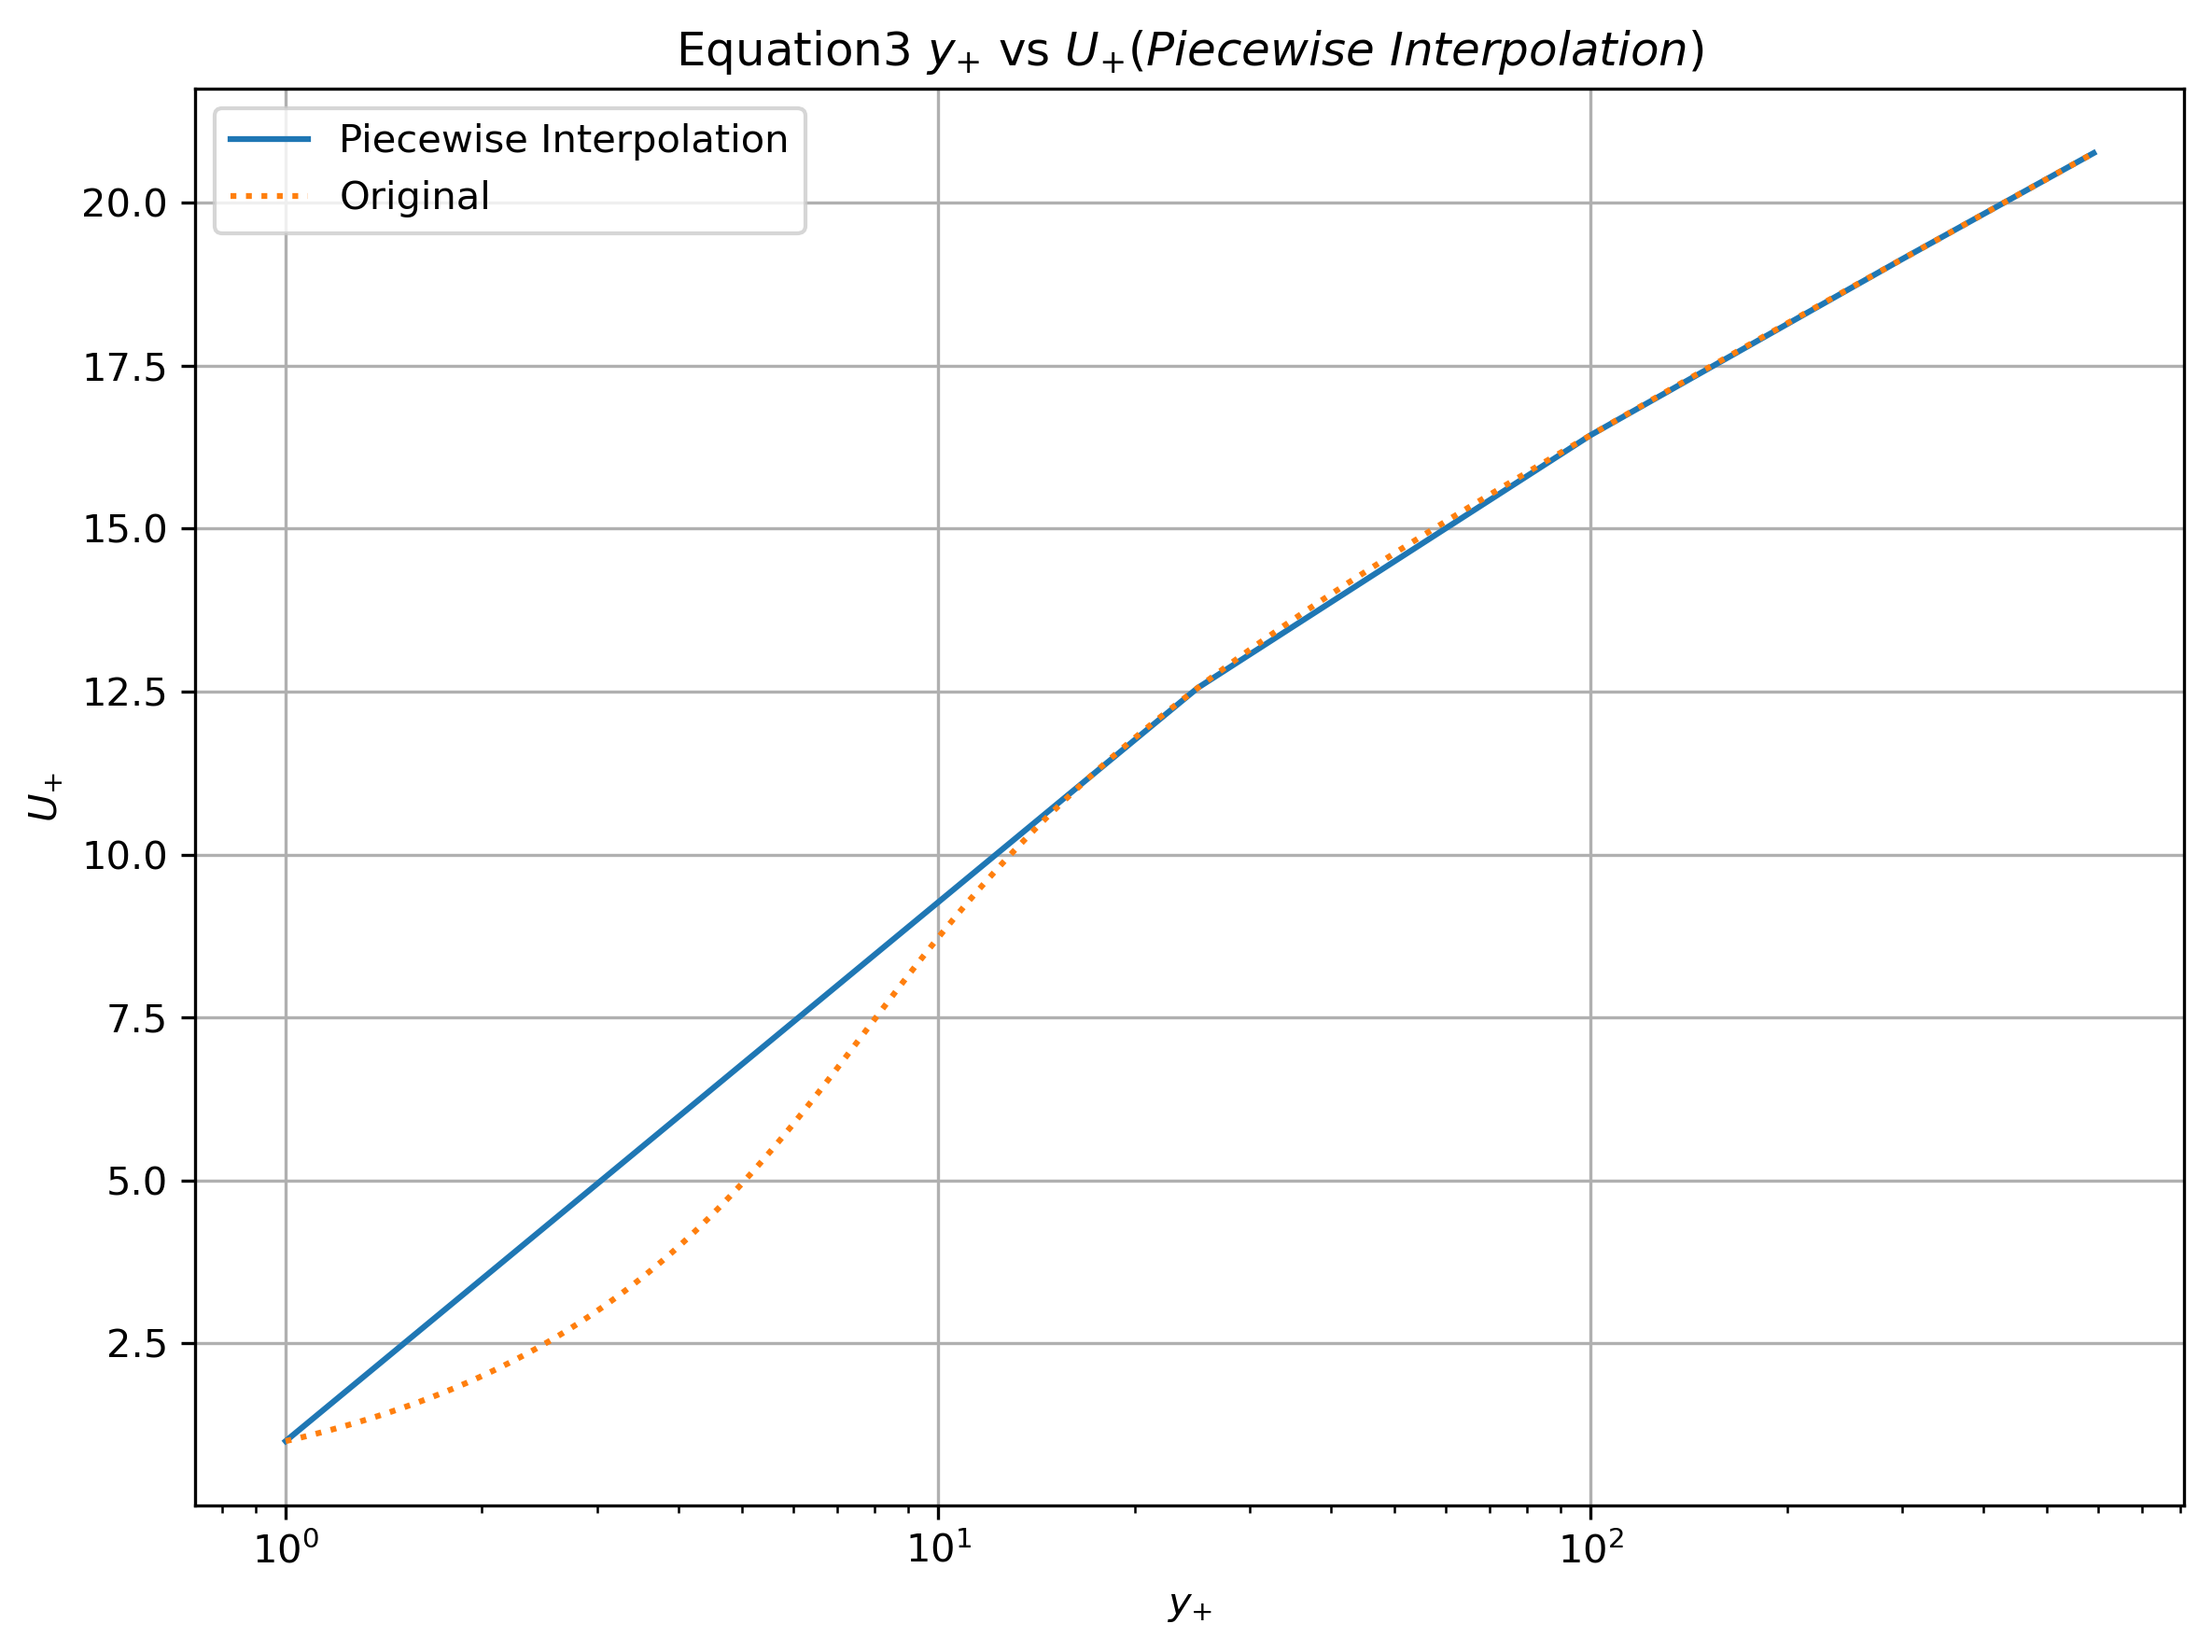

In [183]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(picewise_y,picewise_x,label=f'Piecewise Interpolation')
plt.title("Equation 3(Piecewise Interpolation)")
plt.plot(y_plus_vals,U_plus_vals, label=f'Original',linestyle=':')
plt.title(r'Equation3 $y_{+}$ vs $U_{+}(Piecewise\ Interpolation)$')
plt.xlabel(r'$y_{+}$')
plt.ylabel(r'$U_{+}$')
#plt.xscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [184]:
from scipy.special import legendre
import scipy
def legendre_least_squares(f, N,a,b):
    coefficients = []
    for n in range(N):
        Pn = legendre(n)
        def integrand(x):
            return f(x) * Pn(x)
        def coe(x):
            return Pn(x)**2
        integral=scipy.integrate.quad(integrand,a,b)
        w=scipy.integrate.quad(coe, a, b)
        coefficients.append(integral[0]/w[0])
    return coefficients

def approximate_function(x, coefficients):
    approx = 0
    for n, c in enumerate(coefficients):
        Pn = legendre(n)
        approx += c * Pn(x)
    return approx

coe= legendre_least_squares(f,6,0,20)
x=np.linspace(0,22,590)
y=approximate_function(x,coe)

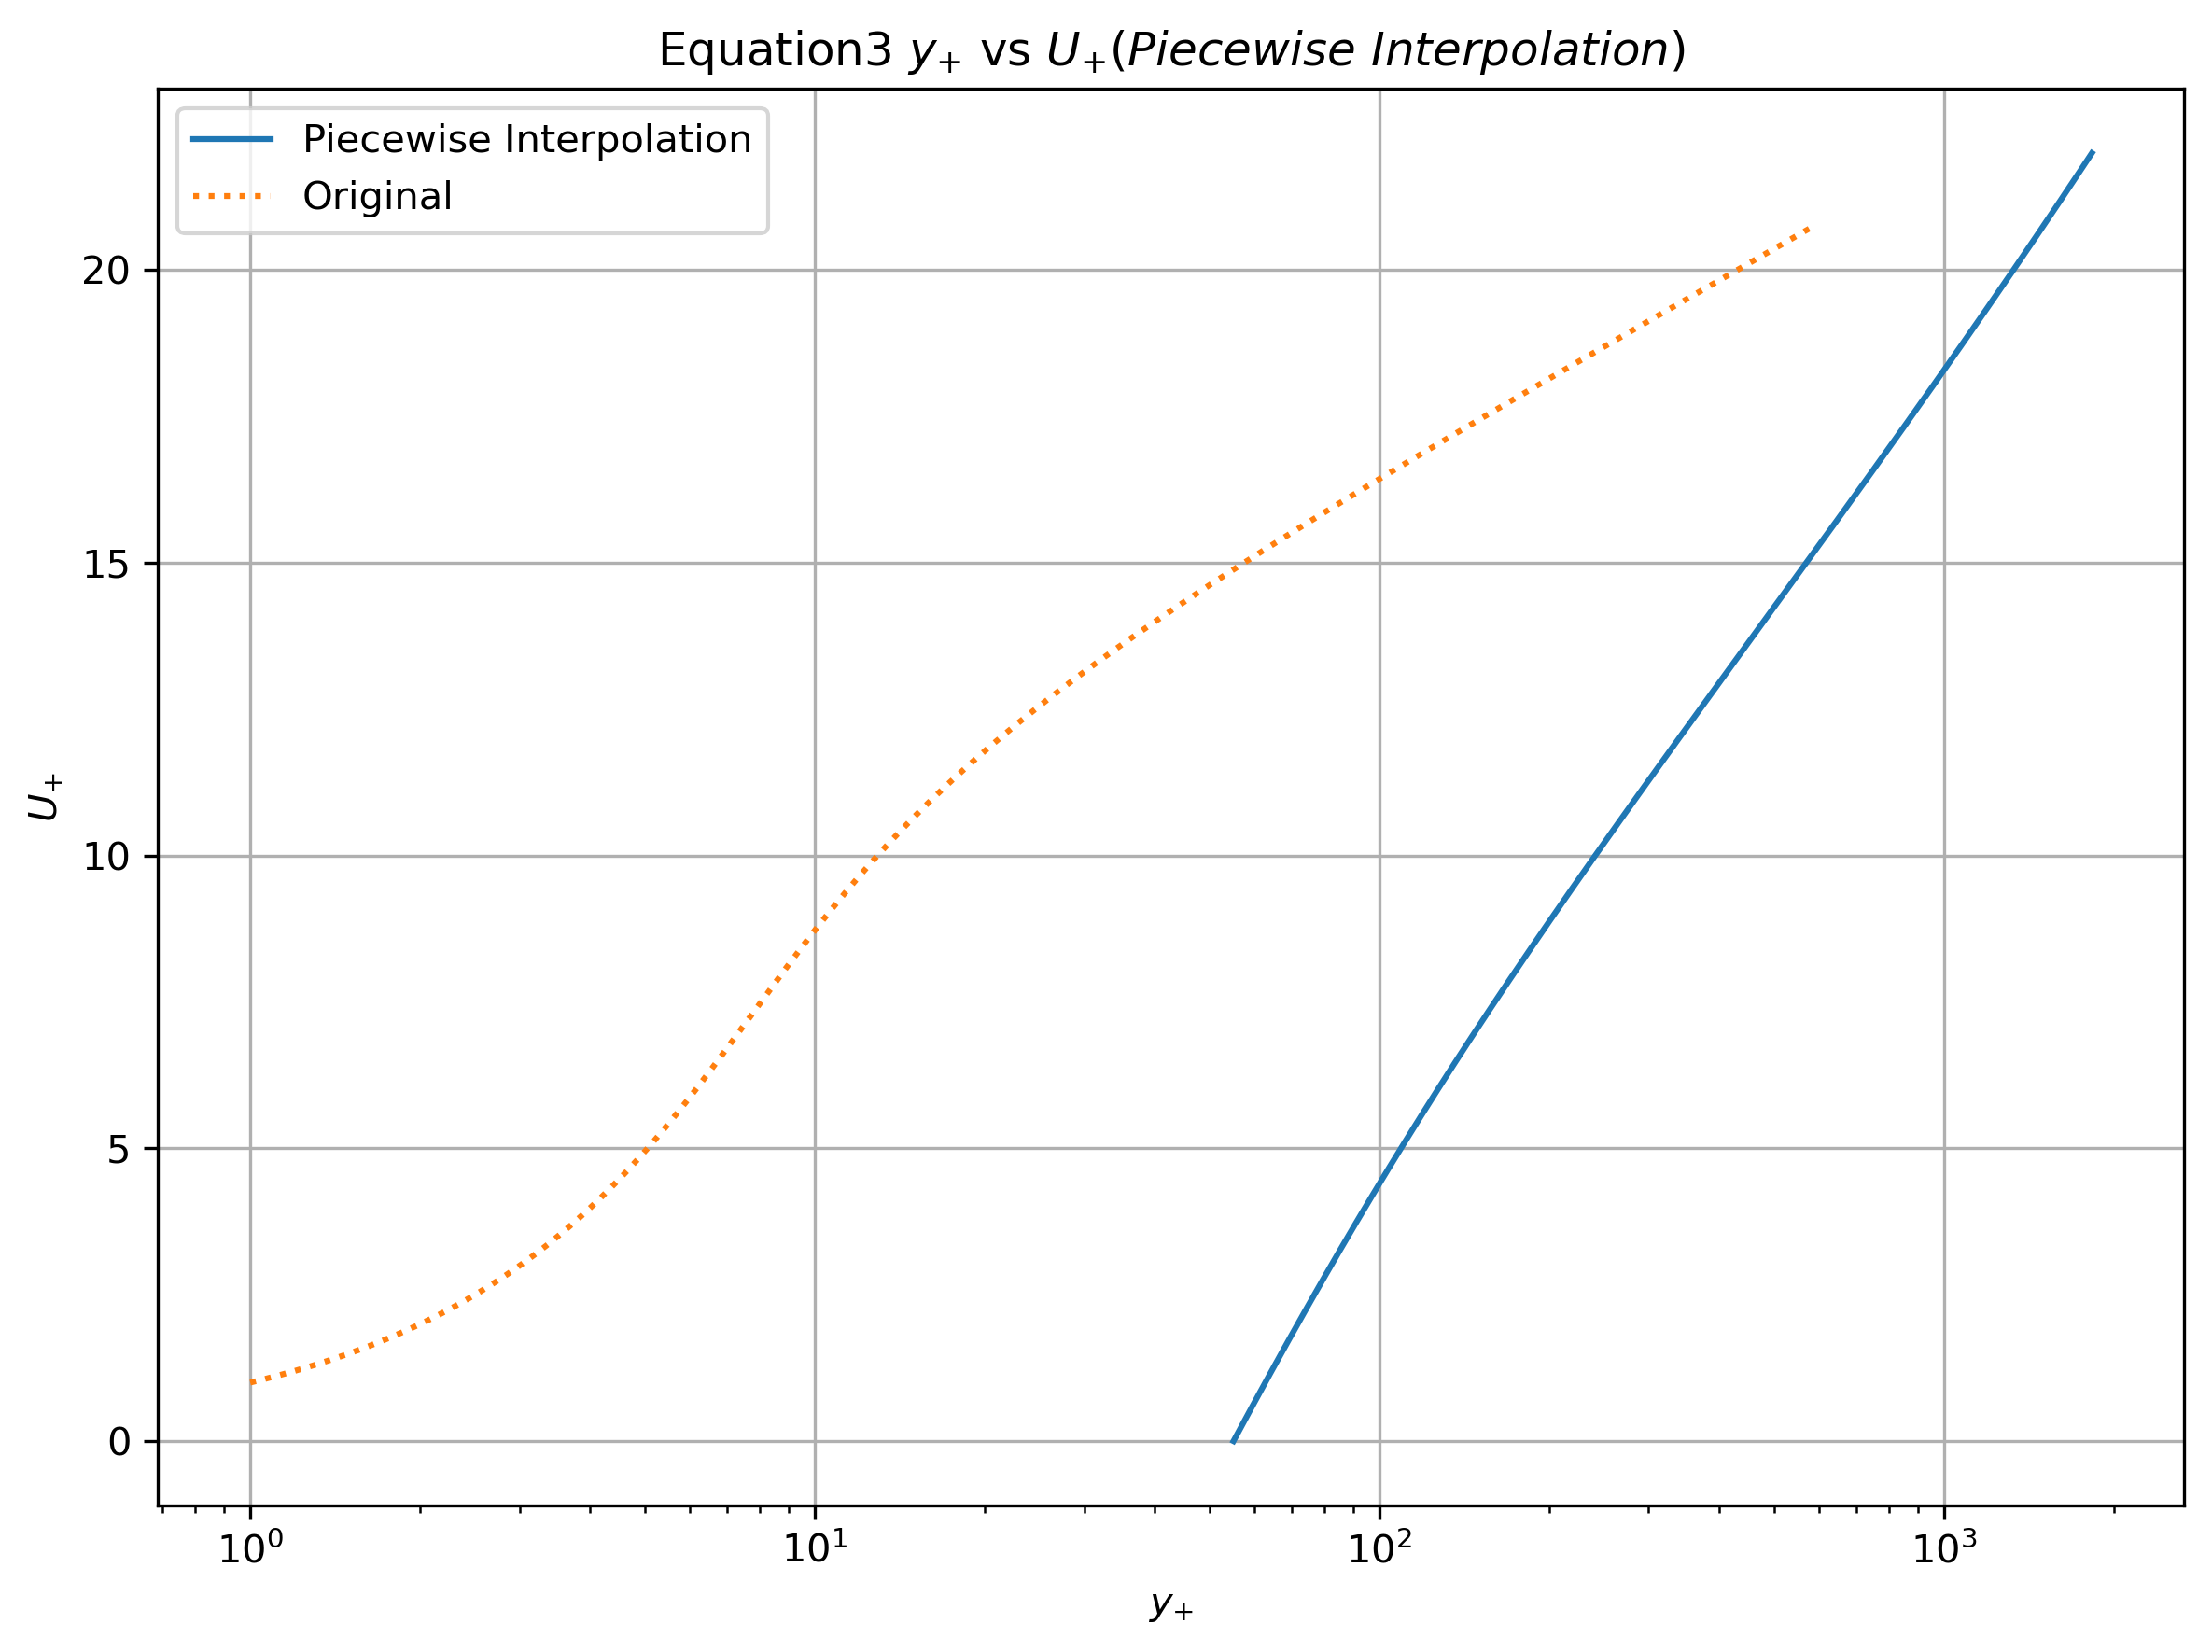

In [185]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(y,x,label=f'Piecewise Interpolation')
plt.title("Equation 3(Piecewise Interpolation)")
plt.plot(y_plus_vals,U_plus_vals, label=f'Original',linestyle=':')
plt.title(r'Equation3 $y_{+}$ vs $U_{+}(Piecewise\ Interpolation)$')
plt.xlabel(r'$y_{+}$')
plt.ylabel(r'$U_{+}$')
plt.xscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()